In [ ]:
# !pip install matplotlib numpy pandas seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

print("Setup complete...!!")

In [ ]:
# Load the dataset

# path = "/home/aiman/ns-3-dev/lora-localization-results.csv"

path_with_noise = "/home/aiman/ns-3-dev/simulation_output/lora-localization-results-with-noise.csv"

df = pd.read_csv(path_with_noise)
df.head()

In [ ]:
df['Error'].describe()

In [ ]:
MDE = df['Error'].mean()
print(f"Mean Error is: {MDE}m")


In [ ]:

# Set up figure layout
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Scatter Plot: Actual vs Estimated Positions
axes[0].scatter(df['ActualX'], df['ActualY'], label='Actual', alpha=0.6)
axes[0].scatter(df['EstimatedX'], df['EstimatedY'], label='Estimated', alpha=0.6)
axes[0].set_title('Actual vs Estimated Positions')
axes[0].set_xlabel('X Coordinate (m)')
axes[0].set_ylabel('Y Coordinate (m)')
axes[0].legend()
axes[0].grid(True)

# 2. Scatter Plot: Color-coded by Error
sc = axes[1].scatter(df['ActualX'], df['ActualY'], c=df['Error'], cmap='viridis', s=40)
axes[1].set_title('Localization Error (color-coded)')
axes[1].set_xlabel('X Coordinate (m)')
axes[1].set_ylabel('Y Coordinate (m)')
plt.colorbar(sc, ax=axes[1], label='Error (m)')
axes[1].grid(True)

# 3. Histogram of Localization Errors
axes[2].hist(df['Error'], bins=20, color='skyblue', edgecolor='black')
axes[2].set_title('Histogram of Localization Error')
axes[2].set_xlabel('Localization Error (m)')
axes[2].set_ylabel('Number of End Devices')
axes[2].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Function to compute the CDF
def compute_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

# Compute CDF for the 'Error' column
error_data = df['Error'].dropna()  # Drop NaN values
sorted_error, cdf = compute_cdf(error_data)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(sorted_error, cdf, marker='.', linestyle='-', color='blue')
plt.title('CDF of Localization Error')
plt.xlabel('Localization Error (m)')
plt.ylabel('CDF')
plt.grid(True)
plt.show()

## Benchmark comparision

/tmp/ipykernel_27577/2825035292.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(mean_errors.keys(), rotation=15)


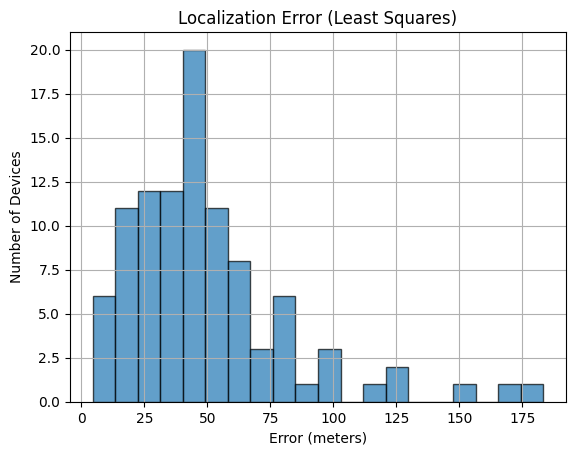

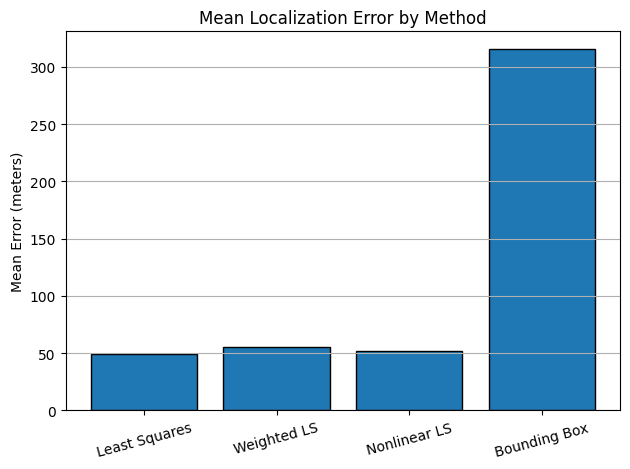

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load localization results
loc_file = "/home/aiman/ns-3-dev/simulation_output/lora-localization-results-with-noise.csv"

try:
    df = pd.read_csv(loc_file)

    # Plot localization error distribution (histogram)
    fig1, ax1 = plt.subplots()
    ax1.hist(df["LS_Error"], bins=20, edgecolor='black', alpha=0.7)
    ax1.set_title("Localization Error (Least Squares)")
    ax1.set_xlabel("Error (meters)")
    ax1.set_ylabel("Number of Devices")
    ax1.grid(True)

    # Plot comparison of all solvers' mean error (bar chart)
    mean_errors = {
        "Least Squares": df["LS_Error"].mean(),
        "Weighted LS": df["WLS_Error"].mean(),
        "Nonlinear LS": df["NLLS_Error"].mean(),
        "Bounding Box": df["BB_Error"].mean()
    }

    fig2, ax2 = plt.subplots()
    ax2.bar(mean_errors.keys(), mean_errors.values(), edgecolor='black')
    ax2.set_title("Mean Localization Error by Method")
    ax2.set_ylabel("Mean Error (meters)")
    ax2.set_xticklabels(mean_errors.keys(), rotation=15)
    ax2.grid(axis='y')

    plt.tight_layout()
    plt.show()

except Exception as e:
    str(e)


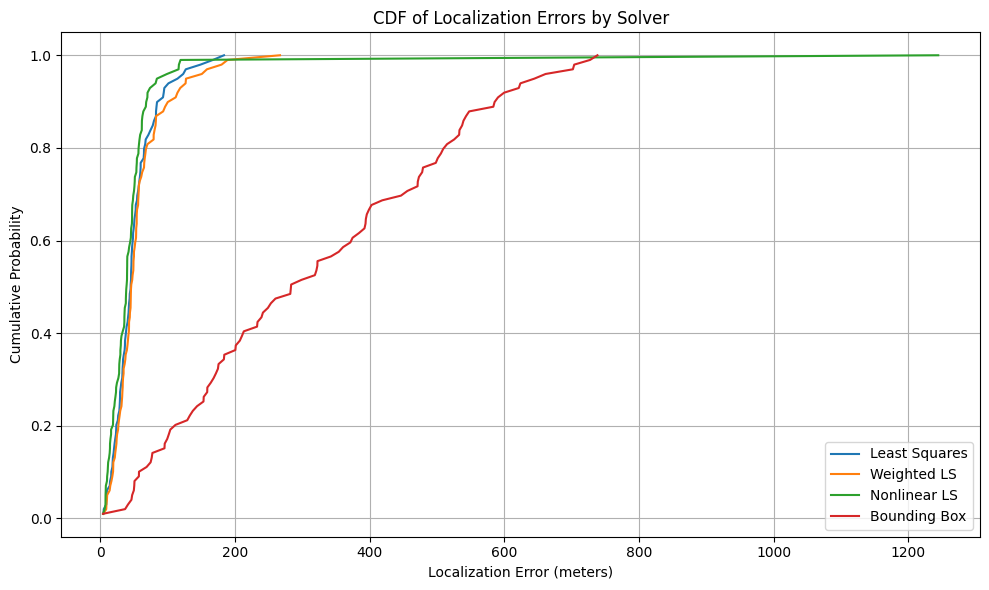

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the localization error CSV
df = pd.read_csv("simulation_output/lora-localization-results-with-noise.csv")

# Plot the CDFs
plt.figure(figsize=(10, 6))

# List of error columns to plot
solvers = {
    "Least Squares": df["LS_Error"],
    "Weighted LS": df["WLS_Error"],
    "Nonlinear LS": df["NLLS_Error"],
    "Bounding Box": df["BB_Error"]
}

for label, errors in solvers.items():
    sorted_err = np.sort(errors)
    cdf = np.arange(1, len(sorted_err)+1) / len(sorted_err)
    plt.plot(sorted_err, cdf, label=label)

plt.title("CDF of Localization Errors by Solver")
plt.xlabel("Localization Error (meters)")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
